<a href="https://colab.research.google.com/github/YounSooKimTech/PhysicalTouch_Proejct/blob/main/AKB_GeneralElection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# file path
file_path = '/content/AKB_GeneralElection.xlsx'

# Read all sheets into a dictionary
all_sheets = pd.read_excel(file_path, sheet_name=None)
print(all_sheets.keys())

# remove the last sheets
filtered_sheets = {key: value for key, value in all_sheets.items() if key != 'Ref'}
print(filtered_sheets.keys())

# merge the dataset
df_merged = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in filtered_sheets.items()],
    ignore_index=True
)

# Display the merged DataFrame
print(df_merged.head())

dict_keys(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', 'Ref'])
dict_keys(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
   Ranking         full name Affiliation Number of votes   Type Sheet
0        1      Atsuko Maeda           A            4630  Media  2009
1        2       Yuko Oshima           K            3345  Media  2009
2        3    Mariko Shinoda           A            2852  Media  2009
3        4     Mayu Watanabe           B            2625  Media  2009
4        5  Minami Takahashi           A            2614  Media  2009


In [33]:
df_merged.rename(columns={'Sheet': 'Year', 'full name':"FullName", "Number of votes":"Votes"}, inplace=True)

df_merged

,Ranking,FullName,Affiliation,Votes,Type,Year
0,1,Atsuko Maeda,A,4630,Media,2009
1,2,Yuko Oshima,K,3345,Media,2009
2,3,Mariko Shinoda,A,2852,Media,2009
3,4,Mayu Watanabe,B,2625,Media,2009
4,5,Minami Takahashi,A,2614,Media,2009
...,...,...,...,...,...,...
633,76,Yuzuki Hidaka,NO,18818,Upcoming Girls,2018
634,77,Reina Hasegawa,SO,18563,Upcoming Girls,2018
635,78,Okada Miku,SKE研,18377,Upcoming Girls,2018
636,79,Eriko Shiro,KIND OF,18359,Upcoming Girls,2018


In [34]:
df_merged["FullName"].value_counts()

,count
FullName,
Minami Minegishi,10
Jurina Matsui,10
Mayu Watanabe,9
Akane Takayanagi,9
Rino Sashihara,9
...,...
Risako Goto,1
Ota Yumiri,1
Takami Ishiguro,1


In [35]:
df_merged.to_csv("AKB_Votes.csv", index=False)

In [36]:
top_16_by_year = df_merged.groupby('Year', group_keys=False).apply(lambda x: x.nsmallest(16, 'Ranking'))

top_16_by_year

<ipython-input-36-bbcf6e441acf>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_16_by_year = df_merged.groupby('Year', group_keys=False).apply(lambda x: x.nsmallest(16, 'Ranking'))


,Ranking,FullName,Affiliation,Votes,Type,Year
0,1,Atsuko Maeda,A,4630,Media,2009
1,2,Yuko Oshima,K,3345,Media,2009
2,3,Mariko Shinoda,A,2852,Media,2009
3,4,Mayu Watanabe,B,2625,Media,2009
4,5,Minami Takahashi,A,2614,Media,2009
...,...,...,...,...,...,...
569,12,Juri Takahashi,B,48100,Media,2018
570,13,Mukaichi Mion,A,47485,Media,2018
571,14,Yoshida Akari,M,46837,Media,2018
572,15,Nao Furuhata,NO,45688,Media,2018


In [42]:
top_16_by_year.groupby("Year")["Votes"].sum()
top_16_by_year.groupby("Year")["Votes"].min().mean()

29949.0

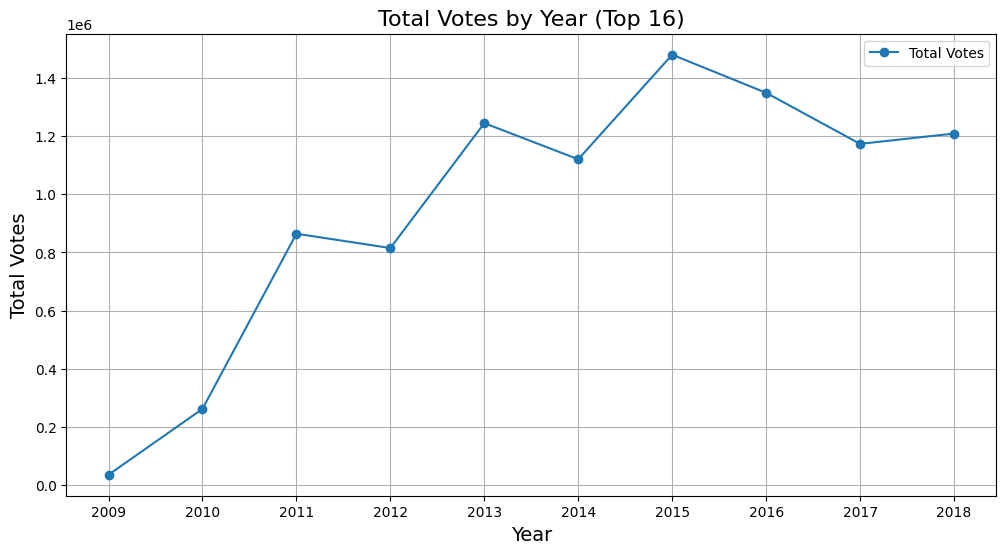

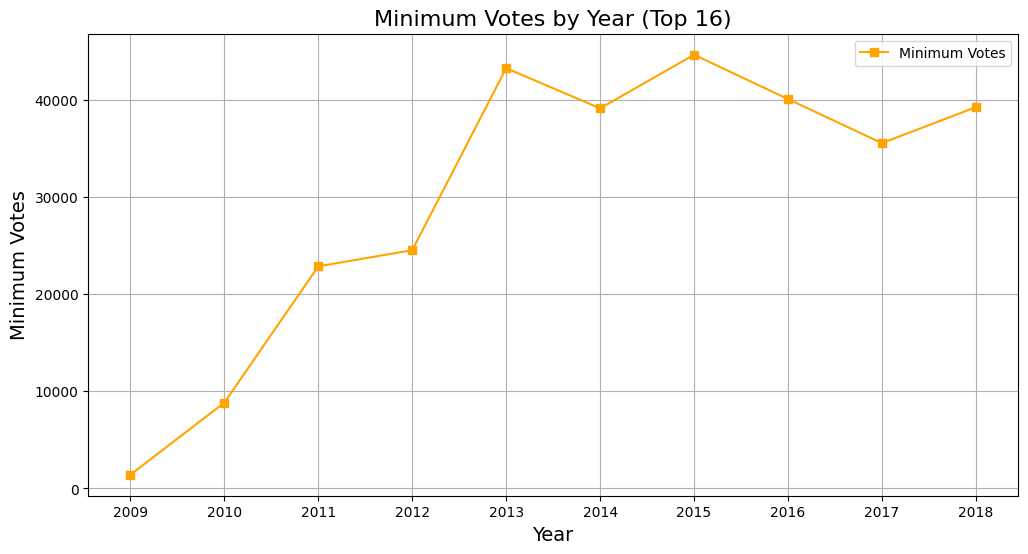

In [38]:
import matplotlib.pyplot as plt

# Calculate the sum and minimum of votes by year
votes_sum = top_16_by_year.groupby("Year")["Votes"].sum()
votes_min = top_16_by_year.groupby("Year")["Votes"].min()

# Plot the sum of votes by year
plt.figure(figsize=(12, 6))
plt.plot(votes_sum.index, votes_sum.values, marker='o', label='Total Votes')
plt.title('Total Votes by Year (Top 16)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Votes', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Plot the minimum votes by year
plt.figure(figsize=(12, 6))
plt.plot(votes_min.index, votes_min.values, marker='s', color='orange', label='Minimum Votes')
plt.title('Minimum Votes by Year (Top 16)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Minimum Votes', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


In [39]:
pivot_data = top_16_by_year.pivot(index='FullName', columns='Year', values='Ranking')
pivot_data

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
FullName,,,,,,,,,,
Akane Takayanagi,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,15.0,NaN
Aki Takajo,NaN,13.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amina Sato,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Atsuko Maeda,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aya Shibata,NaN,NaN,NaN,NaN,NaN,15.0,15.0,NaN,NaN,NaN
Erena Ono,11.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haruka Kodama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN
Haruna Kojima,6.0,7.0,6.0,7.0,9.0,8.0,NaN,NaN,NaN,NaN
Homma Hiyo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,16.0


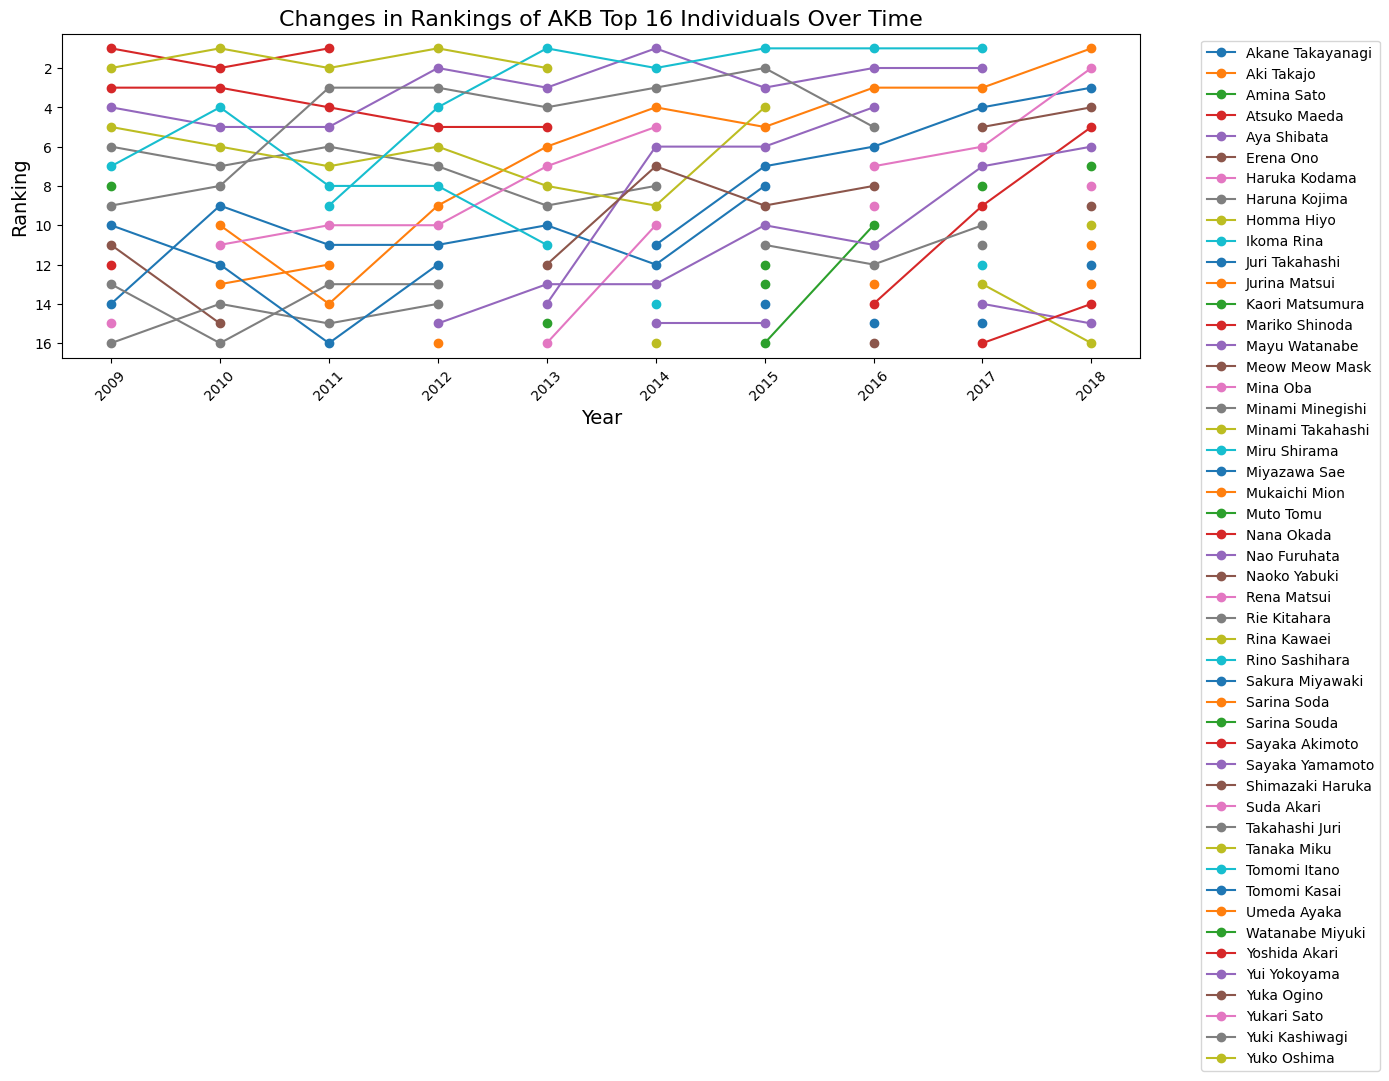

In [40]:
# Popularity increase: jurina matsui, Rino Sashihara, sakura miyawaki, yui yokoyama, yuki kashiwagi

plt.figure(figsize=(14, 8))
for person in pivot_data.index:
    plt.plot(pivot_data.columns, pivot_data.loc[person], marker='o', label=person)

# Customize the plot
plt.gca().invert_yaxis()  # Ranking is better with lower numbers, so invert the y-axis
plt.title('Changes in Rankings of AKB Top 16 Individuals Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Ranking', fontsize=14)
plt.xticks(pivot_data.columns, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [41]:
# Read all sheets into a dictionary
all_sheets = pd.read_excel(file_path, sheet_name=None)

# Access the data
for sheet_name, df in all_sheets.items():
    print(f"Sheet: {sheet_name}")
    print(df.head())  # Display the first few rows of each sheet

Sheet: 2009
   Ranking         full name Affiliation  Number of votes   Type
0        1      Atsuko Maeda           A             4630  Media
1        2       Yuko Oshima           K             3345  Media
2        3    Mariko Shinoda           A             2852  Media
3        4     Mayu Watanabe           B             2625  Media
4        5  Minami Takahashi           A             2614  Media
Sheet: 2010
   Ranking       full name Affiliation  Number of votes   Type
0        1     Yuko Oshima           K            31448  Media
1        2    Atsuko Maeda           A            30851  Media
2        3  Mariko Shinoda           A            23139  Media
3        4    Tomomi Itano           K            20513  Media
4        5   Mayu Watanabe           B            20088  Media
Sheet: 2011
   Ranking       full name Affiliation  Number of votes   Type
0        1    Atsuko Maeda           A           139892  Media
1        2     Yuko Oshima           K           122843  Media
2      